### Import all necessary libraries

In [2]:
# import numpy for numerical computation
import numpy as np

In [3]:
# import pandas for data manipulation
import pandas as pd

In [4]:
# import matplotlib for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# import scikit learn for machine learning tasks and algorithms 
import sklearn

### Explore the dataset for cleaning

In [6]:
#  load in the data 
df = pd.read_csv('Datasets/regression_table.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
X    1000 non-null float64
Y    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


#### there are no missing values and the columns are of the flaot type, we will do a simple visualisation.

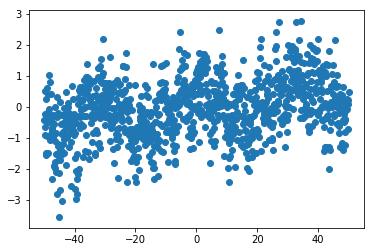

In [8]:
plt.scatter(df.X, df.Y)
plt.show()

- This dataset is noisy and a linear model wont perform at high accuracy so we make use of an SVR

In [9]:
# convert the columns to ndarray
sample_x = np.array([df['X'].values]).transpose()
sample_y = df['Y'].values

# sample_y

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
sample_x = scale.fit_transform(sample_x)


- we will now split the data into train and test split, so that the model can generalise properly on unseen data.

In [12]:
# import train test split from model selection 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_x, sample_y, test_size=0.2, random_state=0)

In [75]:
# y_train

In [13]:
#  import SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

In [14]:
#  instantiate the support vector regression
reg = SVR(gamma='scale', C=1.0, epsilon=0.2)

# fit the model on the training data
reg.fit(X_train, y_train)

# predict on the testing dataset
y_pred = reg.predict(X_test)

# compute the mean squared error
mse = MSE(y_test, y_pred)
# X_train
mse

0.6962408644768436

- As the Linear regressor has high MSE relative to the Support Vector Regression model, we can further reduce MSE by using another model, and also performing hyperparameter tuning. 

In [15]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# instantiate the model
dt = DecisionTreeRegressor(max_depth=3, random_state=0)
# fit the model on training data
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# performance evaluation
mse1 = MSE(y_test, y_pred)

mse1

0.6319583751125567

- Decision tree regressor performs better than SVR which performs better than the linear regressor.
- Model performance can be improved by hyperparameter tuning, gradient boosting and various ensemble methods.